In [56]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [192]:
folder = r'C:\Projects\fin566_fall_2020_group_three\backtestingResults'
stra_inst = ['T3INTC', 'T3JPM', 'T3MSFT', 'T3AAPL']
experiments = ['SPY2COMP', 'SPY2SPY', 'COMP2COMP', 'COMP2SPY']

figsize = (15,5)

## Utils

In [17]:
def find_file(folder, strategy_instance, file_type):
    """
    """
    regex = re.compile('(.*{}.*{}.*)'.format(ins, file_type))
    for root, dirs, files in os.walk(folder):
          for file in files:
                if regex.match(file):
                    return file

In [19]:
## example
for ins in stra_inst:
    print(find_file(os.path.join(folder, 'SPY2COMP'), ins, 'pnl'))

BACK_T3INTC_2020-12-19_201938_start_10-01-2019_end_10-31-2019_pnl.csv
BACK_T3JPM_2020-12-19_201910_start_10-03-2019_end_10-31-2019_pnl.csv
BACK_T3MSFT_2020-12-19_202026_start_10-02-2019_end_10-31-2019_pnl.csv
BACK_T3AAPL_2020-12-19_202003_start_10-04-2019_end_10-31-2019_pnl.csv


## Collect PnL

In [194]:
pnls = {}
for experiment in experiments:
    for ins in stra_inst:
        print('{}-{}'.format(experiment,ins))
        file = find_file(os.path.join(folder, experiment), ins, 'pnl')
        data = pd.read_csv(os.path.join(folder, experiment, file), usecols=[1,2], parse_dates=[0])
        data['date-hour'] = data['Time'].apply(lambda x: datetime.strftime(x, format='%m-%d-%H'))
        data.columns = ['Time', 'PnL-{}-{}'.format(experiment,ins), 'date-hour']
        pnls['{}-{}'.format(experiment,ins)] = data

SPY2COMP-T3INTC
SPY2COMP-T3JPM
SPY2COMP-T3MSFT
SPY2COMP-T3AAPL
SPY2SPY-T3INTC
SPY2SPY-T3JPM
SPY2SPY-T3MSFT
SPY2SPY-T3AAPL
COMP2COMP-T3INTC
COMP2COMP-T3JPM
COMP2COMP-T3MSFT
COMP2COMP-T3AAPL
COMP2SPY-T3INTC
COMP2SPY-T3JPM
COMP2SPY-T3MSFT
COMP2SPY-T3AAPL


## SPY2COMP

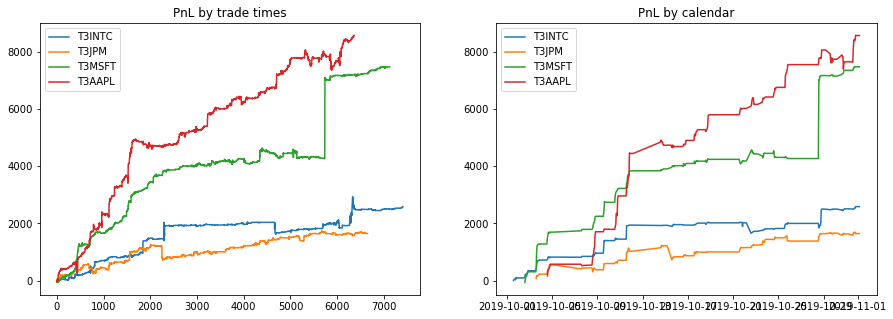

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

for ins in stra_inst:
    data = pnls['{}-{}'.format("SPY2COMP",ins)]
    ax1.plot(data['PnL-{}-{}'.format('SPY2COMP',ins)].astype(float))
    ax1.legend(stra_inst)
    ax1.set_title('PnL by trade times')
    
    data = data.drop_duplicates('date-hour', keep='last')
    ax2.plot(data['Time'], data['PnL-{}-{}'.format('SPY2COMP',ins)].astype(float))
    ax2.legend(stra_inst)
    ax2.set_title('PnL by calendar')

## COMP2SPY vs. SPY2COMP

Text(0.5, 1.0, 'COMP2SPY vs. SPY2COMP')

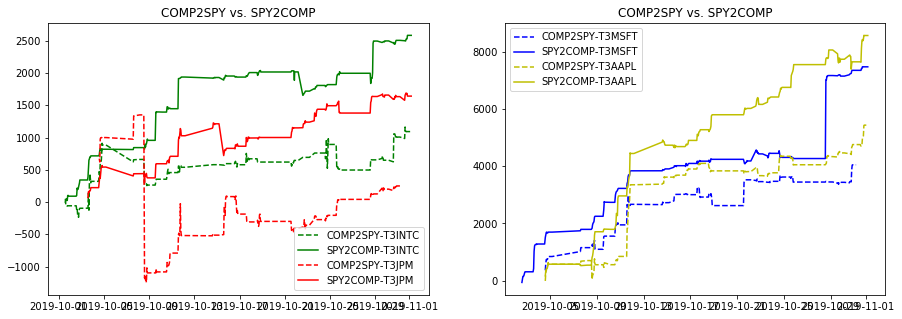

In [196]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

plot_expmts = ['COMP2SPY', 'SPY2COMP']
legends = []
for ins, c in zip(stra_inst[:2],['g', 'r']):
    for exp, ltype in zip(plot_expmts, ['--', '-']):
        data = pnls['{}-{}'.format(exp,ins)]
        data = data.drop_duplicates('date-hour', keep='last')
        ax1.plot(data['Time'], data['PnL-{}-{}'.format(exp,ins)].astype(float), color=c, linestyle=ltype)
        legends.append(exp + '-' + ins)
ax1.legend(legends)
ax1.set_title('COMP2SPY vs. SPY2COMP')
    
legends = []
for ins, c in zip(stra_inst[2:],['b', 'y']):
    for exp, ltype in zip(plot_expmts, ['--', '-']):
        data = pnls['{}-{}'.format(exp,ins)]
        data = data.drop_duplicates('date-hour', keep='last')
        ax2.plot(data['Time'], data['PnL-{}-{}'.format(exp,ins)].astype(float), color=c, linestyle=ltype)
        legends.append(exp + '-' + ins)
ax2.legend(legends)
ax2.set_title('COMP2SPY vs. SPY2COMP')

## COMP2SPY vs. COMP2COMP

Text(0.5, 1.0, 'COMP2COMP vs. SPY2COMP')

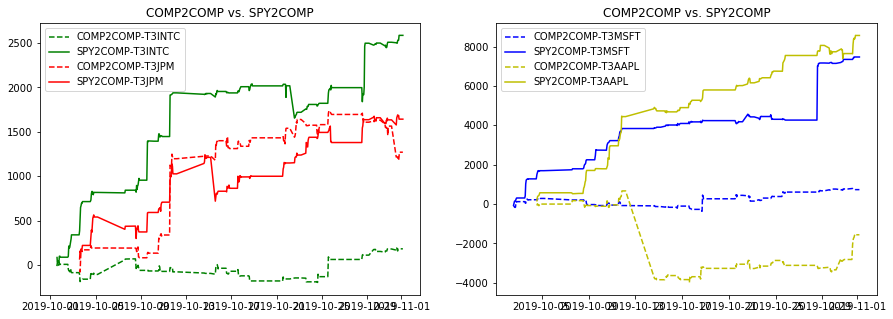

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

plot_expmts = ['COMP2COMP', 'SPY2COMP']
legends = []
for ins, c in zip(stra_inst[:2],['g', 'r']):
    for exp, ltype in zip(plot_expmts, ['--', '-']):
        data = pnls['{}-{}'.format(exp,ins)]
        data = data.drop_duplicates('date-hour', keep='last')
        ax1.plot(data['Time'], data['PnL-{}-{}'.format(exp,ins)].astype(float), color=c, linestyle=ltype)
        legends.append(exp + '-' + ins)
ax1.legend(legends)
ax1.set_title('COMP2COMP vs. SPY2COMP')
    
legends = []
for ins, c in zip(stra_inst[2:],['b', 'y']):
    for exp, ltype in zip(plot_expmts, ['--', '-']):
        data = pnls['{}-{}'.format(exp,ins)]
        data = data.drop_duplicates('date-hour', keep='last')
        ax2.plot(data['Time'], data['PnL-{}-{}'.format(exp,ins)].astype(float), color=c, linestyle=ltype)
        legends.append(exp + '-' + ins)
ax2.legend(legends)
ax2.set_title('COMP2COMP vs. SPY2COMP')